In [2]:
print(bool(1)) 

True


In [ ]:
def predictionThreshold(model, threshold, Xdata):
    # get the best model
    modelBest = model.best_estimator_
    
    # predict probabilities
    probabilities = modelBest.predict_proba(Xdata)

    print(probabilities)
    # define custom threshold
    custom_threshold = threshold
    
    # assign class labels based on the custom threshold
    predictions = (probabilities[:, 1] >= custom_threshold).astype(int)

    return predictions

In [ ]:
from sklearn.metrics import recall_score, f1_score

# Sensitivity/Recall for the positive class (label=1 by default)
recall_scorer = make_scorer(recall_score, pos_label=1)
f1_scorer = make_scorer(f1_score, pos_label=1) 


In [ ]:
# Define multiple scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': make_scorer(f1_score, average='macro')  # Custom F1 scorer
}

1. Adjust the decision threshold
Most classifiers default to threshold = 0.5. But you can lower it to capture more positives:

2. Use F-beta Score to favor recall
- β < 1 → favors precision
- β = 1 → balances precision & recall (this is the F1 score)
- β > 1 → favors recall

- The F-beta Score is a metric that combines precision and recall into a single number, giving you a way to balance the two based on your priorities.
    - Precision = How many selected items are relevant (i.e., how many predicted positives are actually positive)?
    - Recall = How many relevant items are selected (i.e., how many actual positives did we catch)?



In [ ]:
from sklearn.metrics import fbeta_score

# y_true: actual labels
# y_pred: predicted labels
fbeta_score(y_true, y_pred, beta=2)  # favors recall more


In [4]:
# import library
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import optuna

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    learning_rate = trial.suggest_float("learning_rate", 1e-3, 1.0, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    
    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth
    )
    return cross_val_score(model, X, y, cv=3, scoring="roc_auc").mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

In [7]:
from skopt.space import Real, Integer, Categorical

Real(0.01, 7.0, 'log-uniform')

Real(low=0.01, high=7.0, prior='log-uniform', transform='identity')

A Gaussian copula is a type of copula used in statistics to model the dependence structure between multiple random variables. It is particularly useful when the variables follow a normal distribution. 

- Key Concepts
    - Copula: A function that links univariate marginal distribution functions to form a multivariate distribution.
    - Gaussian Copula: Uses the multivariate normal distribution to describe the dependence between variables.
        - How It Works
            - Marginal Distributions: Convert each variable to a uniform distribution using its cumulative distribution function (CDF).
            - Standard Normal Quantile Function: Transform these uniform variables to standard normal variables.
            - Correlation Matrix: Model the dependencies using a correlation matrix.
- Gaussian copulas are widely used in finance for risk management and portfolio optimization. They help in modeling the joint behavior of asset returns and assessing the risk of extreme events.
- Advantages
    - Flexibility: Gaussian copulas can model a wide range of dependency structures, including both positive and negative correlations.
    - Simplicity: They are relatively easy to implement and understand, making them a popular choice in various applications.
    - Tractability: The mathematical properties of Gaussian copulas allow for efficient computation and estimation, which is particularly useful in high-dimensional settings.
    - Compatibility: They work well with normal marginals, which are common in many practical scenarios.
    - Wide Application: Gaussian copulas are extensively used in finance for risk management and portfolio optimization due to their ability to model joint behaviors of asset returns.
        - Applications
            - Risk Management: Helps in assessing the risk of extreme events by modeling dependencies between different financial instruments.
            - Portfolio Optimization: Assists in optimizing portfolios by understanding the joint distribution of asset returns.
- Limitations
    - Lack of Tail Dependence: Gaussian copulas do not capture extreme co-movements well, meaning they lack both upper and lower tail dependence. This can be problematic in scenarios where extreme events are crucial, such as financial crises.
    - Assumption of Normality: They assume that the underlying variables follow a normal distribution, which may not always be the case. This can lead to inaccurate modeling if the actual data deviates significantly from normality.
    - Static Nature: Gaussian copulas are static models and do not account for dynamic changes in dependencies over time. This can limit their effectiveness in applications requiring time-varying correlations.
    - Simplification: The simplification inherent in Gaussian copulas can sometimes lead to oversimplified models that fail to capture complex dependencies.  

- The `Kruskal-Wallis H Test` is a nonparametric method used to compare three or more independent groups based on an ordinal or continuous dependent variable. Contrary to common misconceptions, it does not compare medians directly but tests whether samples originate from the same distribution (or distributions with the same shape and spread).

    - Here's a detailed breakdown:
        1. Purpose
            - Use Case: Determine if there are statistically significant differences between groups (nominal/ordinal) on a ranked dependent variable (ordinal/interval/ratio).

        - Example: Compare customer satisfaction scores (ordinal: 1–5) across three store locations (nominal: A, B, C).

        2. Key Assumptions
            - Independent Groups: Groups are mutually exclusive (e.g., different participants in each group).
            - Ordinal/Continuous Data: Dependent variable is at least ordinal or continuous.
            - Similar Shape/Spread: Distributions across groups should have similar shapes and variances (though not strictly required for validity).

        3. How It Works
            - Rank All Data: Combine all groups and rank the dependent variable values.
            - Calculate Group Ranks: Compute the sum of ranks for each group.
        4. Misconceptions Clarified
            - Not a Median Test: While often interpreted as comparing medians, the test evaluates differences in rank distributions (which may align with medians if distributions have similar shapes).
            - Nonparametric: Does not assume normality (unlike ANOVA).
        5. When to Use
            - Ordinal Data: Likert scales, rankings.
            - Non-Normal Continuous Data: Skewed distributions or small samples.
            - Unequal Group Sizes: Robust to imbalanced group sizes.
        6. Post-Hoc Analysis
            - If the Kruskal-Wallis test is significant, use Dunn’s test to identify pairwise differences:

In [3]:
from scipy.stats import kruskal

# Example data: Exam scores (ordinal/continuous) across three teaching methods
group_A = [78, 85, 88, 92, 95]
group_B = [65, 70, 75, 80, 85]
group_C = [50, 55, 60, 65, 70]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(group_A, group_B, group_C)

print(f"Kruskal-Wallis H Statistic: {statistic:.3f}")
print(f"P-value: {p_value:.3f}")



#  Interpretation
# Significant Result: The small p-value (p < 0.05) means there are significant differences in the distributions of your dependent variable across the groups.

# Reject the Null Hypothesis: The groups are not all from the same population (or populations with the same median/shape).

Kruskal-Wallis H Statistic: 10.411
P-value: 0.005


In [2]:
import scikit_posthocs as sp

# Step 1: Define groups
group_A = [9, 10, 16, 9, 10, 5, 7, 13, 10, 9]
group_B = [16, 19, 15, 17, 19, 11, 6, 17, 11, 9]
group_C = [7, 9, 5, 8, 8, 14, 11, 9, 14, 8]

# Step 2: Combine data
data = [group_A, group_B, group_C]

# Step 3: Perform Dunn's test
dunn_results = sp.posthoc_dunn(data, p_adjust='bonferroni')
print(dunn_results)

          1         2         3
1  1.000000  0.115458  1.000000
2  0.115458  1.000000  0.027465
3  1.000000  0.027465  1.000000


#### Post-hoc Dunn’s tests with Bonferroni correction revealed a significant difference between Group 2 and Group 3 (p = .027), but no significant differences between Group 1 and Group 2 (p = .115) or Group 1 and Group 3 (p > .999).
- Common Pitfalls
    - Misreading the Matrix: Diagonal values (e.g., 1 vs. 1) are always 1.000 (self-comparison).
    - Ignoring Adjustments: Bonferroni reduces Type I errors but increases Type II risk. Consider alternatives like Benjamini-Hochberg for less stringent corrections.
    - Overinterpreting Non-Significance: Small sample sizes or high variance can mask true differences.

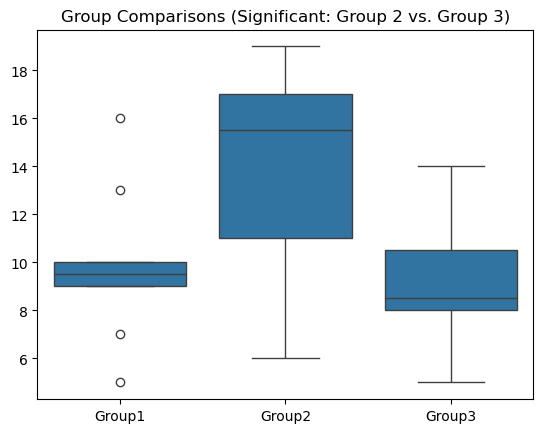

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
groups = ['Group1']*10 + ['Group2']*10 + ['Group3']*10
values = group_A + group_B + group_C  # Replace with your actual data

# Boxplot
sns.boxplot(x=groups, y=values)
plt.title("Group Comparisons (Significant: Group 2 vs. Group 3)")
plt.show()


#### The `Conover-Iman` test is a non-parametric post-hoc procedure used for multiple pairwise comparisons following the rejection of a Kruskal-Wallis test. It's particularly useful when the assumption of equal variances is violated, as it doesn't require homogeneity of variances. This test evaluates whether there are significant differences between group medians by analyzing the ranks of the data.

    - Key Features of the Conover-Iman Test:
        - Non-Parametric Nature: Does not assume normality of the data, making it suitable for ordinal data or data that doesn't meet parametric test assumptions.
        - Pairwise Comparisons: Conducts multiple pairwise comparisons to identify which specific groups differ after a significant Kruskal-Wallis test result.
        - Flexibility with Variances: Appropriate for data with unequal variances, addressing scenarios where homogeneity of variances cannot be assumed.

    - Considerations:
        - Prerequisite Kruskal-Wallis Test: The Conover-Iman test should be conducted only if the Kruskal-Wallis test indicates significant differences among groups.
        - Multiple Testing Correction: Applying adjustments like Holm's method helps control the family-wise error rate during multiple comparisons.
        - Assumption of Continuous Distributions: The test assumes that the distributions are continuous and that any differences are due to shifts in central tendency.

In [9]:
import scikit_posthocs as sp
import pandas as pd

# Sample data
data = pd.DataFrame({
    'values': [7, 8, 5, 6, 9, 4, 3, 5, 4, 2, 6, 7, 8, 5, 6],
    'groups': ['A', 'A', 'A', 'A', 'A', 
               'B', 'B', 'B', 'B', 'B',
               'C', 'C', 'C', 'C', 'C']
})

# Perform Conover-Iman test
p_values = sp.posthoc_conover(data, val_col='values', group_col='groups', p_adjust='holm')
print(p_values)


          A         B         C
A  1.000000  0.003023  0.519491
B  0.003023  1.000000  0.006655
C  0.519491  0.006655  1.000000


#### Explanation:
- Data Structure: The data DataFrame contains two columns: values (the observations) and groups (the group labels). In this example, there are three groups labeled 'A', 'B', and 'C', each with five observations.
- Function Usage: The posthoc_conover function from the scikit-posthocs library is used to perform the Conover-Iman test. The parameters val_col and group_col specify the columns containing the data values and group labels, respectively.
- p-value Adjustment: The p_adjust='holm' parameter applies Holm's correction to adjust for multiple comparisons, controlling the family-wise error rate.
- In this matrix, the diagonal elements are set to -1.000000 (or sometimes NaN) as they represent self-comparisons. The off-diagonal elements show the adjusted p-values for the pairwise comparisons between groups.​
- Notes:
    - Prerequisite Test: It's important to conduct a Kruskal-Wallis test before performing the Conover-Iman test to determine if there are overall differences among group medians. If the Kruskal-Wallis test is significant, the Conover-Iman test can help identify which specific groups differ.​
    - Data Requirements: Ensure that the data meets the assumptions of the Conover-Iman test, particularly that the data is at least ordinal and that the groups are independent.

In [14]:
from scipy.stats import ttest_ind, mannwhitneyu  
import numpy as np

# Large sample data  
group_A = np.random.normal(50, 10, 40)  
group_B = np.random.normal(55, 10, 35)  

# Parametric  
t_stat, p_t = ttest_ind(group_A, group_B)  

# Nonparametric (if needed)  
u_stat, p_u = mannwhitneyu(group_A, group_B)  

print("u_stat", u_stat)
print("p_u", p_u)

u_stat 434.0
p_u 0.004808662736744625


The values you provided (u_stat = 434.0, p_u = 0.0048) appear to be results from a Mann-Whitney U test (a non-parametric test comparing two independent groups). Here's how to interpret and contextualize these results:

Interpretation
U Statistic (434.0)

The Mann-Whitney U statistic quantifies the degree of separation between two groups.

A larger U value suggests greater overlap between groups (if group sizes are unequal, interpret with caution).

Compare this to the critical U value for your sample sizes (use a U-table or statistical software).

P-Value (0.0048)

The p-value is statistically significant at common thresholds (e.g., α = 0.05).

This indicates strong evidence against the null hypothesis, suggesting the distributions of the two groups differ significantly.

Key Considerations
Null Hypothesis

H₀: The two groups are drawn from the same population (no difference in distributions).

H₁: The two groups are not drawn from the same population.

Effect Size

While the p-value indicates significance, calculate the effect size (e.g., rank-biserial correlation or Cohen’s d) to quantify practical importance:

Next Steps
Report Results

Format: U = 434.0, p = 0.0048 (or p < 0.01).

Specify the test (e.g., "Mann-Whitney U test") and significance threshold (e.g., α = 0.05).

Visualize Data

Use boxplots, violin plots, or ECDFs to illustrate group differences.

python
import seaborn as sns  
sns.boxplot(x='Group', y='Variable', data=df)  
Post-Hoc Analysis

If working with multiple comparisons, apply corrections (e.g., Bonferroni).

Consider confidence intervals for the median difference.

Alternative Tests

If assumptions are violated, consider:

Welch’s t-test (for normally distributed data with unequal variances)

Kolmogorov-Smirnov test (for comparing distributions)

Example Conclusion
"The Mann-Whitney U test revealed a statistically significant difference between groups (U = 434.0, p = 0.0048). We reject the null hypothesis and conclude that the distributions of [variable] differ significantly between [Group A] and [Group B]."

In [17]:
import numpy as np  
effect_size = 1 - (2 * u_stat) / (len(group_A) * len(group_B))  # Rank-biserial correlation  
print(effect_size)

0.38


In [ ]:
from scipy.stats import spearmanr, kendalltau

# Spearman's correlation
spearman_corr, spearman_p = spearmanr(df['feature1'], df['feature2'])
print(f"Spearman's correlation: {spearman_corr}, p-value: {spearman_p}")

# Kendall's tau
kendall_corr, kendall_p = kendalltau(df['feature1'], df['feature2'])
print(f"Kendall's tau: {kendall_corr}, p-value: {kendall_p}")

In [19]:
from scipy.stats import kendalltau  

x = [1, 2, 3, 4, 5]  
y = [3, 4, 1, 2, 5]  
tau, p_value = kendalltau(x, y)  

print(f"Kendall’s Tau: {tau:.3f}, p-value: {p_value:.4f}")  
# Output: Kendall’s Tau: 0.200, p-value: 0.5647  


Kendall’s Tau: 0.200, p-value: 0.8167


In [ ]:
Effect Size (τ = 0.200)

Indicates a weak positive monotonic relationship between the variables.

The direction is positive (as one variable increases, the other tends to increase), but the strength is minimal.

Statistical Significance (p = 0.8167)

The p-value is not statistically significant at common thresholds (e.g., α = 0.05 or 0.10).

This means we fail to reject the null hypothesis—there is no strong evidence of a monotonic relationship.

Practical Implications
The weak association (τ = 0.2) is likely due to random chance rather than a true relationship.

Even if a slight trend exists in your data, it is not statistically distinguishable from noise.



In [18]:
from scipy.stats import spearmanr

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 7, 8]
corr, p_value = spearmanr(x, y)
print(f"Spearman correlation: {corr}, p-value: {p_value}")


Spearman correlation: 0.9999999999999999, p-value: 1.4042654220543672e-24


#### Nonlinear Regression
- Understanding the Basics of Nonlinear Regression
Nonlinear regression is a statistical method that models the relationship between a dependent variable and one or more independent variables. Unlike linear regression, which assumes a linear relationship between the dependent and independent variables, nonlinear regression allows for more complex relationships that can be modeled using nonlinear functions.

- Nonlinear functions can take many forms, such as polynomial, exponential, logarithmic, or trigonometric functions. The choice of function depends on the nature of the data and the research question. In general, the goal of nonlinear regression is to find the best-fit parameters of the chosen function that minimize the sum of the squared errors between the predicted values and the actual values.

Nonlinear regression is a statistical technique that models the relationship between a dependent variable and one or more independent variables using a nonlinear function. In Python, the scipy.optimize module provides the curve_fit function, which employs non-linear least squares to fit a function to data. ​
Medium
+2
SciPy Documentation
+2
MolSSI Education
+2

Implementing Nonlinear Regression in Python:

Here's a step-by-step guide to performing nonlinear regression using curve_fit:​

Import Necessary Libraries:

python
Copy
Edit
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
Define the Nonlinear Function:

Specify the model function you aim to fit to your data. For example, a quadratic function:

python
Copy
Edit
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c
Prepare Your Data:

Assume you have datasets x_data and y_data representing your independent and dependent variables, respectively.

Fit the Model to the Data:

Use curve_fit to estimate the parameters of your model:

python
Copy
Edit
params, covariance = curve_fit(quadratic_model, x_data, y_data)
Here, params contains the optimal values for the parameters (a, b, c), and covariance provides the estimated covariance of these parameters.

Visualize the Fit:

To assess the quality of the fit, plot the original data alongside the fitted curve:

python
Copy
Edit
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, quadratic_model(x_data, *params), color='red', label='Fitted curve')
plt.legend()
plt.show()
Considerations:

Initial Parameter Estimates: Providing initial guesses for the parameters can enhance the convergence of the fitting process. This can be done using the p0 argument in curve_fit.​
Medium
+1
SciPy Documentation
+1

Parameter Bounds: To constrain the parameters within specific ranges, utilize the bounds argument. For example:​

python
Copy
Edit
  params, covariance = curve_fit(quadratic_model, x_data, y_data, bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))
This constrains all parameters to be non-negative.​

Handling Outliers: Outliers can significantly impact the fit. Consider using robust fitting methods or preprocessing your data to mitigate their influence.​

For a more comprehensive tutorial on nonlinear regression in Python, you might find this resource helpful



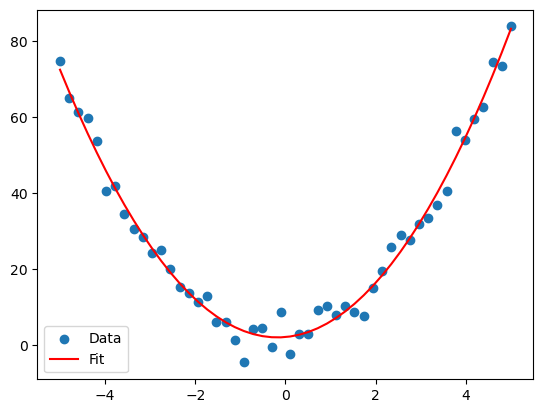

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Generate sample data
np.random.seed(0)
x = np.linspace(-5, 5, num=50)
y = 2.0 + 1.5 * x + 3.0 * x**2 + np.random.normal(scale=3.0, size=x.shape)


# Define the nonlinear function
def quadratic_func(x, a, b, c):
    return a + b * x + c * x**2


# Fit the nonlinear model
popt, pcov = curve_fit(quadratic_func, x, y)


# Visualize the results
plt.scatter(x, y, label='Data')
plt.plot(x, quadratic_func(x, *popt), 'r-', label='Fit')
plt.legend()
plt.show()

In [16]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Example dataset with multiple features
df = pd.DataFrame({
    'Feature1': [10, 20, 30, 40, 50],
    'Feature2': [5, 3, 2, 4, 1],
    'Feature3': [0, 1, 1, 0, 1],
    'Target': [100, 200, 300, 400, 500]
})

# Extract features and target
X = df.drop(columns=['Target'])  # Features
y = df['Target']  # Target variable

# Compute Mutual Information for all features
mi_scores = mutual_info_regression(X, y)

# Convert to a DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort by importance
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

print(mi_df)


    Feature  MI Score
0  Feature1  0.200000
1  Feature2  0.116667
2  Feature3  0.000000


In [15]:
from sklearn.feature_selection import mutual_info_regression

mi_score = mutual_info_regression(df_encoded[['Weather']], df_encoded['PlayTennis'])
print(f"Mutual Information Score: {mi_score[0]:.4f}")


Mutual Information Score: 0.0188


In [13]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Sample data
df = pd.DataFrame({
    'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes']
})

# Encode categorical data
df_encoded = df.apply(LabelEncoder().fit_transform)

# Compute mutual information
mi_scores = mutual_info_classif(df_encoded[['Weather']], df_encoded['PlayTennis'], discrete_features=True)

# Display result
print(f"Mutual Information (Entropy-Based) Score for Weather: {mi_scores[0]:.4f}")


Mutual Information (Entropy-Based) Score for Weather: 0.1842


In [11]:
import numpy as np
from scipy.stats import entropy

# Sample probabilities (e.g., class distribution)
probs = np.array([.99, 0.01])  # Example: 50% "Yes", 50% "No"

# Compute entropy
entropy_value = entropy(probs, base=2)
print(f"Entropy: {entropy_value:.4f}")

Entropy: 0.0808


In [5]:
import os
num_workers = os.cpu_count()
print(f"Number of CPU cores: {num_workers}")


Number of CPU cores: 16


In [ ]:
xfrom sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# Assuming you have X (features) and y (target) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train your model (e.g., RandomForestClassifier)
model.fit(X_train, y_train)

# Calculate permutation importance
result = permutation_importance(
    model, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Sort features by importance
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': result.importances_mean,
    'std': result.importances_std
}).sort_values('importance', ascending=False)

# Plot results
importance.plot(x='feature', y='importance', kind='bar', yerr='std', figsize=(10, 6))
plt.title("Permutation Feature Importance")
plt.xlabel("Features")
plt.ylabel("Mean accuracy decrease")
plt.tight_layout()
plt.show()


MI Score: 0.0000
               SkewedFeature    Target
SkewedFeature       1.000000  0.032353
Target              0.032353  1.000000


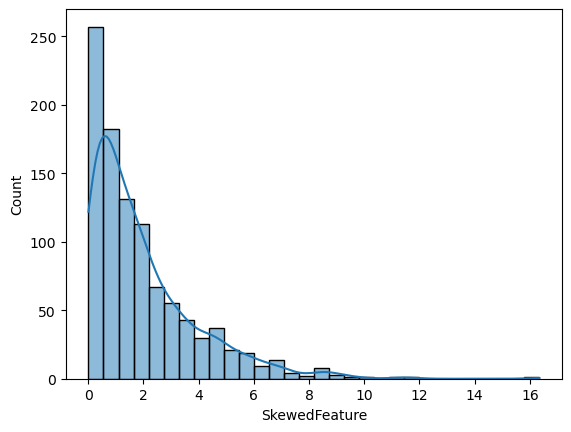

In [3]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate a skewed distribution (e.g., exponential)
np.random.seed(42)
df = pd.DataFrame({
    'SkewedFeature': np.random.exponential(scale=2, size=1000),
    'Target': np.random.uniform(0, 100, 1000)  # Continuous target
})

# Compute MI
mi_score = mutual_info_regression(df[['SkewedFeature']], df['Target'])
print(f"MI Score: {mi_score[0]:.4f}")
print(df.corr())
# plot
sns.histplot(df['SkewedFeature'], bins=30, kde=True)
plt.show()

In [4]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import pandas as pd

# Simulate a dataset with multiple skewed features
np.random.seed(42)
df = pd.DataFrame({
    'Feature1': np.random.exponential(scale=2, size=1000),
    'Feature2': np.random.exponential(scale=5, size=1000),
    'Feature3': np.random.uniform(0, 50, 1000),
    'Target': np.random.uniform(0, 100, 1000)  # Continuous target
})

# Compute MI for all features
mi_scores = mutual_info_regression(df[['Feature1', 'Feature2', 'Feature3']], df['Target'])

# Convert to a DataFrame for better readability
mi_df = pd.DataFrame({'Feature': ['Feature1', 'Feature2', 'Feature3'], 'MI Score': mi_scores})
print(mi_df.sort_values(by='MI Score', ascending=False))


    Feature  MI Score
0  Feature1  0.025352
2  Feature3  0.014123
1  Feature2  0.000000


#### An MI score of 0.0000 suggests that the feature contains no useful information about the target variable. 

#### [Quantile Transformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html)
- The `QuantileTransformer` is a non-linear transformation that maps data to a uniform or normal distribution based on quantiles. It helps make data more Gaussian-like and is particularly useful when dealing with skewed or heavy-tailed distributions. Feature independence in the context of the `QuantileTransformer` means that each feature (or column) in your dataset is transformed independently of the others.
    - Feature Independence: The `QuantileTransformer` operates independently on each feature, so it doesn't require the features to be on the same scale.
    - Outliers: The `QuantileTransformer` is robust to outliers, as it spreads out the most frequent values and reduces the impact of marginal outliers.
    - Non-linear Transformation: Since the transformation is non-linear, it may distort linear relationships between variables. If preserving linear relationships is important for your analysis, you might want to consider other scaling methods.

In [31]:
# import library
from sklearn.preprocessing import QuantileTransformer

# initialize transformer
transformer = QuantileTransformer(output_distribution='normal', n_quantiles=2000, random_state=RANDOM_STATE)

# fit the transformer on the training data
transformer.fit(train_data[numericCols])

QuantileTransformer(n_quantiles=2000, output_distribution='normal',
                    random_state=1776)

In [32]:
# transform both the training and testing data
train_data_transformed = pd.DataFrame(transformer.transform(train_data[numericCols]),columns=numericCols)
test_data_transformed = pd.DataFrame(transformer.transform(test_data[numericCols]),columns=numericCols)

- For the normal distribution (output_distribution='normal'):
    - The transformed values approximate a standard normal distribution.
    - Extreme values are mapped to the tails of the normal distribution.
    - The highest value is typically mapped close to 3 (3 standard deviations above the mean).

In [38]:
train_data_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_DON,21655.0,-0.001761,0.999583,-5.199338,-0.691511,0.008778,0.677247,5.199338
Age_CAN,21655.0,-0.016138,1.075381,-5.199338,-0.684362,-0.025709,0.646804,5.199338
BMI_CAN,21643.0,0.003493,0.999326,-5.199338,-0.670952,0.018183,0.691511,5.199338
BMI_DON,21649.0,0.001690,0.998931,-5.199338,-0.666609,-0.000599,0.678894,5.199338
BloodUreaNitrogenLevel_DON,21614.0,0.000318,1.003988,-5.199338,-0.727804,-0.025709,0.699496,5.199338
WeightKg_DON,21652.0,0.005182,0.999217,-5.199338,-0.659219,-0.000627,0.674883,5.199338
WeightKg_CAN,21649.0,0.004353,0.997399,-5.199338,-0.661559,0.013167,0.672129,5.199338
HeightCm_CAN,21655.0,0.003546,0.995759,-5.199338,-0.602602,-0.004389,0.627601,5.199338
HeightCm_DON,21655.0,0.006364,0.996675,-5.199338,-0.682778,0.020064,0.663901,5.199338
Creatinine_DON,21614.0,-0.001178,0.994696,-5.199338,-0.680623,-0.008151,0.683569,5.199338


#### Histogram After Transformation

In [27]:
uv.histogramPlot(train_data_transformed, numericCols, bins=30, txt='Train')

In [9]:
import numpy as np

# Assuming you have two arrays: array1 and array2
array1 = np.array([1, 2, 3, 4, 5])
array2 = np.array([6, 7, 8, 9, 10])

# Calculate the average
average_array = (array1 + array2) / 2

print("Array 1:", array1)
print("Array 2:", array2)
print("Average:", average_array)


Array 1: [1 2 3 4 5]
Array 2: [ 6  7  8  9 10]
Average: [3.5 4.5 5.5 6.5 7.5]


In [8]:
import pandas as pd

# Example DataFrame with duplicate indices
data = {'A': [1, 2, 3, 4, 5, 6]}
df = pd.DataFrame(data, index=[0, 1, 1, 2, 3, 3])

# Show all duplicate indices
duplicates = df[df.index.duplicated(keep=False)]
print(duplicates)

   A
1  2
1  3
3  5
3  6


In [7]:
import pandas as pd

# Sample DataFrames for demonstration
df_impute = pd.DataFrame({'A': [1, 2, np.nan], 'B': [4, np.nan, 6]}, index=[0, 1, 2])
imputeGMM = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]}, index=[0, 1, 2])
imputeKNN = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]}, index=[0, 1, 2])

# Check Index and Columns
print("imputeGMM Index:\n", imputeGMM.index)
print("imputeKNN Index:\n", imputeKNN.index)
print("df_impute Index:\n", df_impute.index)

print("imputeGMM Columns:\n", imputeGMM.columns)
print("imputeKNN Columns:\n", imputeKNN.columns)
print("df_impute Columns:\n", df_impute.columns)

# Align Index and Columns
imputeGMM = imputeGMM.reindex(index=df_impute.index, columns=df_impute.columns)
imputeKNN = imputeKNN.reindex(index=df_impute.index, columns=df_impute.columns)

# Verify Alignment
print("Aligned imputeGMM Index:\n", imputeGMM.index)
print("Aligned imputeKNN Index:\n", imputeKNN.index)
print("Aligned imputeGMM Columns:\n", imputeGMM.columns)
print("Aligned imputeKNN Columns:\n", imputeKNN.columns)

# Combine the imputed DataFrames
df_concat = pd.concat([imputeGMM, imputeKNN])
df_mean = df_concat.groupby(df_concat.index).mean()

# Update the original DataFrame with the mean imputed values
df_impute = df_mean

# Describe the updated DataFrame
print(df_impute.describe().T)

imputeGMM Index:
 Index([0, 1, 2], dtype='int64')
imputeKNN Index:
 Index([0, 1, 2], dtype='int64')
df_impute Index:
 Index([0, 1, 2], dtype='int64')
imputeGMM Columns:
 Index(['A', 'B'], dtype='object')
imputeKNN Columns:
 Index(['A', 'B'], dtype='object')
df_impute Columns:
 Index(['A', 'B'], dtype='object')
Aligned imputeGMM Index:
 Index([0, 1, 2], dtype='int64')
Aligned imputeKNN Index:
 Index([0, 1, 2], dtype='int64')
Aligned imputeGMM Columns:
 Index(['A', 'B'], dtype='object')
Aligned imputeKNN Columns:
 Index(['A', 'B'], dtype='object')
   count  mean  std  min  25%  50%  75%  max
A    3.0   2.0  1.0  1.0  1.5  2.0  2.5  3.0
B    3.0   5.0  1.0  4.0  4.5  5.0  5.5  6.0


In [4]:
import pandas as pd

# Create two sample DataFrames
df1 = pd.DataFrame({
    'A': [1, 1, 1],
    'B': [1, 1, 1],
    'C': [1, 1, 1]
})

df2 = pd.DataFrame({
    'A': [2, 2, 2],
    'B': [2, 2, 2],
    'C': [2, 2, 2]
})

print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)

# Concatenate the DataFrames vertically (along rows)
result_vertical = pd.concat([df1, df2])

# Calculate the mean by index
df_mean = result_vertical.groupby(result_vertical.index).mean()


print("\nVertical Concatenation Result:")
print(df_mean)

# # Concatenate the DataFrames horizontally (along columns)
# df3 = pd.DataFrame({
#     'D': ['D0', 'D1', 'D2'],
#     'E': ['E0', 'E1', 'E2']
# }, index=[0, 1, 2])

# result_horizontal = pd.concat([df1, df3], axis=1)

# print("\nHorizontal Concatenation Result:")
# print(result_horizontal)


DataFrame 1:
   A  B  C
0  1  1  1
1  1  1  1
2  1  1  1

DataFrame 2:
   A  B  C
0  2  2  2
1  2  2  2
2  2  2  2

Vertical Concatenation Result:
     A    B    C
0  1.5  1.5  1.5
1  1.5  1.5  1.5
2  1.5  1.5  1.5


In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd

def KNN_GMM
    # GMM Imputation
    gmm = GaussianMixture(n_components=2, random_state=0)
    gmm.fit(data.dropna())
    gmm_imputed_data = data.copy()
    for feature in data.columns:
        missing_indices = data[feature].isnull()
        if missing_indices.any():
            imputed_values = gmm.sample(missing_indices.sum())[0]
            gmm_imputed_data.loc[missing_indices, feature] = imputed_values[:, data.columns.get_loc(feature)]
    
    # KNN Imputation
    knn_imputer = KNNImputer(n_neighbors=3)
    knn_imputed_data = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)
    
    # Combine GMM and KNN Imputed Values
    combined_imputed_data = data.copy()
    for feature in data.columns:
        combined_imputed_data[feature] = (gmm_imputed_data[feature] + knn_imputed_data[feature]) / 2

print(combined_imputed_data)

   feature1  feature2  feature3
0   1.00000   3.00101  5.000000
1   2.00000   1.00000  4.000000
2   3.66589   2.00000  3.000000
3   4.00000   3.00000  1.833968
4   5.00000   4.00000  1.000000


In [1]:
import pandas as pd
from kmodes.kmodes import KModes
import numpy as np

# Sample DataFrame with nominal and ordinal variables
data = {
    'education_level': ['High School', 'Bachelors', 'Masters', 'PhD', 'Bachelors', 'Masters'],
    'diagnosis': ['A', 'B', 'C', 'A', 'B', 'A'],
    'income_level': ['Low', 'Medium', 'High', 'High', 'Medium', 'Low'],
}

df = pd.DataFrame(data)

# Ordinal encoding for "education_level" and "income_level" (ordinal features)
ordinal_mapping = {
    'education_level': {'High School': 0, 'Bachelors': 1, 'Masters': 2, 'PhD': 3},
    'income_level': {'Low': 0, 'Medium': 1, 'High': 2}
}
df['education_level'] = df['education_level'].map(ordinal_mapping['education_level'])
df['income_level'] = df['income_level'].map(ordinal_mapping['income_level'])

# One-Hot Encoding for "diagnosis" (nominal feature)
df = pd.get_dummies(df, columns=['diagnosis'], drop_first=True)

# Convert DataFrame to numpy array for KModes
X = df.values

# Apply K-modes clustering
k_modes = KModes(n_clusters=2, init='Huang', n_init=10, verbose=1)
clusters = k_modes.fit_predict(X)

# Add the cluster labels to the DataFrame
df['cluster'] = clusters

# Display the clustered DataFrame
print(df)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, moves: 0, cost: 8.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Sample DataFrame with nominal and ordinal variables
# Example: "education_level" (ordinal), "diagnosis" (nominal)

data = {
    'education_level': ['High School', 'Bachelors', 'Masters', 'PhD', 'Bachelors', 'Masters'],
    'diagnosis': ['A', 'B', 'C', 'A', 'B', 'A'],
}

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Ordinal Encoding for "education_level" (ordinal feature)
ordinal_encoder = OrdinalEncoder(categories=[['High School', 'Bachelors', 'Masters', 'PhD']])
df['education_level'] = ordinal_encoder.fit_transform(df[['education_level']])

# One-Hot Encoding for "diagnosis" (nominal feature)
df = pd.get_dummies(df, columns=['diagnosis'], drop_first=True)

# Display the DataFrame after encoding
print("Preprocessed DataFrame:")
print(df)

# Fit the Latent Class Analysis model using Gaussian Mixture Model (GMM)
# Specify the number of latent classes (k)
k = 2  # Number of latent classes

# Convert the DataFrame to a numpy array for fitting
X = df.values

# Initialize and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
gmm.fit(X)

# Predict the latent class for each observation
df['predicted_class'] = gmm.predict(X)

# Display the DataFrame with the predicted latent classes
print("\nDataFrame with Predicted Latent Classes:")
print(df)

# Optionally, visualize the cluster assignments for the first two features
# Since the number of features is more than 2, you can visualize using PCA or just the first 2 dimensions for simplicity
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['predicted_class'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Latent Class Analysis - Clusters (PCA)')
plt.colorbar(label='Predicted Class')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist, squareform

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

def plot_dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}\n'
              f'Estimated number of clusters: {n_clusters_}')
    plt.show()

# 1. K-distance Graph
def k_distance_graph(X, k):
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    distances, _ = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]
    plt.figure(figsize=(10, 7))
    plt.plot(distances)
    plt.title(f'{k}-distance Graph')
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'Distance to {k}th nearest neighbor')
    plt.show()

k_distance_graph(X, 4)  # Try different k values

# 2. Grid Search with Silhouette Score
def grid_search(X, eps_range, min_samples_range):
    best_score = -1
    best_params = None
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            if len(np.unique(labels)) > 1:  # More than one cluster
                score = silhouette_score(X, labels)
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
    return best_params

eps_range = np.arange(0.1, 1.0, 0.1)
min_samples_range = range(2, 10)
best_eps, best_min_samples = grid_search(X, eps_range, min_samples_range)
print(f"Best parameters: eps={best_eps}, min_samples={best_min_samples}")

# 3. Elbow Method for eps
def elbow_method(X):
    neighbors = NearestNeighbors(n_neighbors=2)
    nbrs = neighbors.fit(X)
    distances, _ = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:, 1]
    plt.figure(figsize=(10, 7))
    plt.plot(distances)
    plt.title('Elbow Method for eps')
    plt


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from gower import gower_matrix
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Sample mixed dataset
data = pd.DataFrame({
    "Education_Level": ["High School", "Bachelor", "Master", "PhD", "Bachelor"],
    "Shopping_Frequency": ["Weekly", "Monthly", "Rarely", "Weekly", "Monthly"],
    "Payment_Method": ["Credit Card", "Debit Card", "Cash", "Credit Card", "Digital Wallet"]
})

# Define order for ordinal features
education_order = ["High School", "Bachelor", "Master", "PhD"]
frequency_order = ["Rarely", "Monthly", "Weekly"]

# Encode ordinal features
ordinal_enc = OrdinalEncoder(categories=[education_order, frequency_order])
data[["Education_Level", "Shopping_Frequency"]] = ordinal_enc.fit_transform(data[["Education_Level", "Shopping_Frequency"]])

# One-hot encode nominal features
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_nominal = encoder.fit_transform(data[["Payment_Method"]])
nominal_cols = encoder.get_feature_names_out(["Payment_Method"])

# Convert to DataFrame
encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=nominal_cols)

# Combine transformed ordinal and nominal data
processed_data = pd.concat([data.drop(columns=["Payment_Method"]), encoded_nominal_df], axis=1)

# Compute Gower's Distance
gower_dist = gower_matrix(processed_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2, metric="precomputed")  # Adjust 'eps' as needed
clusters = dbscan.fit_predict(gower_dist)

# Add cluster labels to data
data["Cluster"] = clusters

print(data)


In [ ]:
processed_data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from gower import gower_matrix
from sklearn.preprocessing import OrdinalEncoder

# Sample mixed dataset
data = pd.DataFrame({
    'Education_Level': ['High School', 'Associate', 'Bachelor', 'Master', 'Associate'],
    'Shopping_Frequency': ['Weekly', 'Monthly', 'Rarely', 'Weekly', 'Monthly'],
    'Payment_Method': ['Credit Card', 'Debit Card', 'Cash', 'Credit Card', 'Digital Wallet']
})

# Encoding ordinal features (Education Level, Shopping Frequency)
ordinal_enc = OrdinalEncoder(categories=[
    ['High School', 'Associate', 'Bachelor', 'Master'],  # Education Level (ordered)
    ['Rarely', 'Monthly', 'Weekly']  # Shopping Frequency (ordered)
])
data[['Education_Level', 'Shopping_Frequency']] = ordinal_enc.fit_transform(
    data[['Education_Level', 'Shopping_Frequency']]
)

# Compute Gower distance matrix
distance_matrix = gower_matrix(data)

# Apply DBSCAN with tuned parameters
dbscan = DBSCAN(eps=0.4, min_samples=2, metric="precomputed")  # Adjust eps and min_samples
data["Cluster"] = dbscan.fit_predict(distance_matrix)

print(data)


In [ ]:
distance_matrix

In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder

# Sample categorical dataset
data = np.array([
    ["A", "Weekly", "Credit Card"],
    ["B", "Monthly", "Debit Card"],
    ["A", "Weekly", "Cash"],
    ["C", "Rarely", "Credit Card"],
    ["B", "Weekly", "Digital Wallet"]
])

# One-hot encode categorical data
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data)

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(encoded_data)

# Predict cluster membership
clusters = gmm.predict(encoded_data)

# Add results to DataFrame
df = pd.DataFrame(data, columns=["Preferred Brand", "Shopping Frequency", "Payment Method"])
df["Cluster"] = clusters

print(df)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class KFoldTargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_column, target_column, n_splits=5, smoothing=10):
        self.categorical_column = categorical_column
        self.target_column = target_column
        self.n_splits = n_splits
        self.smoothing = smoothing

    def fit(self, X, y=None):
        self.global_mean_ = X[self.target_column].mean()
        self.kf_ = KFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        return self

    def transform(self, X):
        df_encoded = X.copy()
        df_encoded[f"{self.categorical_column}_encoded"] = np.nan

        for _, val_idx in self.kf_.split(X):
            train_mask = ~X.index.isin(val_idx)
            train_fold = X[train_mask]
            val_fold = X.iloc[val_idx]

            category_stats = train_fold.groupby(self.categorical_column)[self.target_column].agg(['mean', 'count'])
            category_stats['smooth_mean'] = (category_stats['mean'] * category_stats['count'] + self.global_mean_ * self.smoothing) / (category_stats['count'] + self.smoothing)
            
            df_encoded.loc[val_fold.index, f"{self.categorical_column}_encoded"] = val_fold[self.categorical_column].map(category_stats['smooth_mean'])
        
        df_encoded[f"{self.categorical_column}_encoded"] = df_encoded[f"{self.categorical_column}_encoded"].fillna(self.global_mean_)
        return df_encoded[[f"{self.categorical_column}_encoded"]]

# Simulated dataset
np.random.seed(42)
df = pd.DataFrame({
    'category': np.random.choice(['A', 'B', 'C', 'D', 'E'], 500),
    'target': np.random.randint(0, 2, 500)
})

# Define range of smoothing values to test
param_grid = {
    'encoder__smoothing': [1, 5, 10, 20, 50, 100],
    'classifier__n_estimators': [50, 100, 200]
}

# Create pipeline
pipeline = Pipeline([
    ('encoder', KFoldTargetEncoder(categorical_column='category', target_column='target')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(df, df['target'])

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best AUC: {grid_search.best_score_:.4f}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


def kfold_target_encoding_smooth(df, categorical_column, target_column, n_splits=5, smoothing=10):
    df_encoded = df.copy()  # Ensure we're working on a copy of the original DataFrame
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    global_mean = df[target_column].mean()
    df_encoded[f"{categorical_column}_encoded"] = np.nan

    for _, val_idx in kf.split(df):
        train_mask = ~df.index.isin(val_idx)
        train_fold = df[train_mask]
        val_fold = df.iloc[val_idx]

        category_stats = train_fold.groupby(categorical_column)[target_column].agg(['mean', 'count'])
        category_stats['smooth_mean'] = (category_stats['mean'] * category_stats['count'] + global_mean * smoothing) / (category_stats['count'] + smoothing)
        
        # Use .loc to avoid chained assignment
        df_encoded.loc[val_fold.index, f"{categorical_column}_encoded"] = val_fold[categorical_column].map(category_stats['smooth_mean'])
    
    # Replace inplace=True with explicit reassignment
    df_encoded[f"{categorical_column}_encoded"] = df_encoded[f"{categorical_column}_encoded"].fillna(global_mean)
    
    return df_encoded




# Simulated dataset
np.random.seed(42)
df = pd.DataFrame({
    'category': np.random.choice(['A', 'B', 'C', 'D', 'E'], 500),
    'target': np.random.randint(0, 2, 500)
})

# Define range of smoothing values to test
smoothing_values = [1, 5, 10, 15, 20, 40, 50, 75]
best_smoothing = None
best_score = -np.inf

# Perform Cross-Validation Loop
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for smoothing in smoothing_values:
    scores = []
    
    for train_idx, val_idx in kf.split(df):
        train_df, val_df = df.iloc[train_idx], df.iloc[val_idx]
        
        # Apply target encoding within the current fold
        train_encoded = kfold_target_encoding_smooth(train_df, 'category', 'target', smoothing=smoothing)
        
        # Use the encoding from train_encoded to encode val_df
        category_stats = train_encoded.groupby('category')['category_encoded'].mean()
        val_encoded = val_df.copy()
        # In the cross-validation loop:
        val_encoded['category_encoded'] = val_df['category'].map(category_stats)
        val_encoded['category_encoded'] = val_encoded['category_encoded'].fillna(train_encoded['category_encoded'].mean())
        
        # Prepare features
        X_train, X_val = train_encoded[['category_encoded']], val_encoded[['category_encoded']]
        y_train, y_val = train_df['target'], val_df['target']
        
        # Train model
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        
        # Evaluate model
        y_pred = model.predict_proba(X_val)[:, 1]
        auc_score = roc_auc_score(y_val, y_pred)
        scores.append(auc_score)
    
    mean_score = np.mean(scores)
    print(f"Smoothing: {smoothing}, Mean AUC: {mean_score:.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_smoothing = smoothing

print(f"\nBest smoothing value: {best_smoothing} with AUC: {best_score:.4f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

X = np.random.rand(300, 2)  # Replace with your dataset

# Compute distances to k-nearest neighbors
k = 5  # Typically, k = min_samples
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort and plot k-distance graph
sorted_distances = np.sort(distances[:, k - 1])
plt.plot(sorted_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {k}th nearest neighbor")
plt.title("K-Distance Plot")
plt.show()


In [ ]:
from feature_engine.transformation import YeoJohnsonTransformer
import pandas as pd

# Example: Transforming a DataFrame using Yeo-Johnson transformation
df = pd.DataFrame({'A': [1, 2, 3, 4, 5]})
transformer = YeoJohnsonTransformer(variables=['A'])
df_transformed = transformer.fit_transform(df)
print(df_transformed)

In [ ]:
from feature_engine.transformation import YeoJohnsonTransformer
import pandas as pd

# Sample data
df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [-1, -2, -3, -4, -5]})

# Initialize the YeoJohnsonTransformer
transformer = YeoJohnsonTransformer(variables=['A', 'B'])

# Fit and transform the data
df_transformed = transformer.fit_transform(df)

print("Original Data:\n", df)
print("Transformed Data:\n", df_transformed)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import DBSCAN #For outlier detection/clustering

# --- 1. Example with Numerical Features (Clustering Data) ---
data = {'Feature1': [1.00, 1.10, 2.00, 1.05],
        'Feature2': [2.0, 2.2, 4.0, 2.1],
        'Feature3': [3.00, 3.30, 6.00, 3.15]}

df = pd.DataFrame(data)

# Initialize QuantileTransformer (normal distribution as example)
quantile_transformer = QuantileTransformer(output_distribution='normal',
                                           n_quantiles=4, #Important: should be <= number of samples
                                           random_state=0)

# Fit and transform the data
df_transformed = quantile_transformer.fit_transform(df)
df_transformed = pd.DataFrame(df_transformed, columns=df.columns) #Convert back to DataFrame

print("Transformed Clustering Data:\n", df_transformed)

# Example of using the transformed data for DBSCAN clustering (outlier detection)
dbscan = DBSCAN(eps=0.5, min_samples=2)  # Adjust parameters as needed
clusters = dbscan.fit_predict(df_transformed) #predict the clusters using transformed data

print("\nCluster Labels:\n", clusters)
# Add cluster labels to original dataframe
df['Cluster'] = clusters
print("\nCombined dataframe with clusters")
print(df)

# --- 2. Example with Severity Level Data (Illustrative, requires cleaning) ---
data2 = {'column1': ['Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', '50% - Requires considerable assistance and fre...', '20% - Very sick, hospitalization necessary: ac...', 'Unknown', 'Unknown', '20% - Very sick, hospitalization necessary: ac...', '50% - Very sick, hospitalization necessary: ac...'],
         'column2': ['Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', '50% - Requires considerable assistance and fre...', '20% - Very sick, hospitalization necessary: ac...', 'Unknown', 'Unknown', '50% - Very sick, hospitalization necessary: ac...', '20% - Very sick, hospitalization necessary: ac...']}
df2 = pd.DataFrame(data2)

# Replace 'Unknown' values with NaN
df2 = df2.replace('Unknown', np.nan)

# Function to extract the percentage (requires cleaning and handling NaN)
def extract_percentage(text):
    if pd.isna(text):  # Handle NaN values
        return np.nan
    try:
        return float(text.split('%')[0])  # Extract percentage as float
    except:
        return np.nan  #Handle


In [ ]:
data2

In [ ]:
df2

In [ ]:
# combine features
features = ['BloodInfectionSource_DON','UrineInfection_DON','PulmonaryInfection_DON','InfectionClinical_DON','OtherInfectionSource_DON']

# new feature
df['Infection_CountTotal_DON'] = df[features].apply(lambda row: sum(1 for value in row if value == 1 or value == 'Yes'), axis=1)

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_don  = uf.insertIntoDataFrame(df_don, ['Infection_CountTotal_DON'])
df_ordinal  = uf.insertIntoDataFrame(df_ordinal, ['Infection_CountTotal_DON'])

# change datatype to category
df = uf.toCategory(df, ['Infection_CountTotal_DON'])

In [ ]:
from sklearn.svm import OneClassSVM
import numpy as np

# Example: Generate random data (normal data)
X_train = np.random.randn(100, 2)  # 100 normal data points with 2 features

# Train One-Class SVM
clf = OneClassSVM(nu=0.1, kernel="rbf", gamma="scale")
clf.fit(X_train)

# Example: New data for prediction
X_new = np.array([[1,1],[-1,-1],[-1.5,-2.5]])

# Predict anomalies (1 for normal, -1 for outlier)
predictions = clf.predict(X_new)

print(predictions)  # Output: [ 1 -1], where -1 is an outlier and 1 is normal


In [ ]:
X_train.shape

In [ ]:
X_train.min(axis=0)

In [ ]:
X_train.min()

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
transformer = PowerTransformer(method='box-cox')

# Fit and transform the data
transformed_data = transformer.fit_transform(df[features])

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=features)

print("Transformed data:")
print(transformed_df.head())

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming you have a dataset with missing values
X = np.array([[1, 2, np.nan], [3, np.nan, 1], [np.nan, 5, 6]])

# Initialize and fit the SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# X_imputed now contains the imputed dataset


In [ ]:
X_imputed

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Sample dataset with missing values
X = np.array([[1, 2, np.nan], 
              [3, np.nan, 1], 
              [np.nan, 5, 6], 
              [8, 7, 9]])

# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the dataset
X_imputed = imputer.fit_transform(X)

print("Original Data:\n", X)
print("Imputed Data:\n", X_imputed)


#### Customizing Estimators
##### In the example below:
- You can replace LinearRegression() with any other regression model (like DecisionTreeRegressor, BayesianRidge, etc.) based on your requirements.
- The IterativeImputer will use the specified model to predict missing values iteratively.
- Handling Convergence Issues
    - If you encounter convergence warnings (as seen in your search results), consider these strategies:
    - Increase max_iter: Allow more iterations for convergence.
    - Feature Scaling: Ensure that your features are appropriately scaled (e.g., using StandardScaler).
    - Regularization: If using models like Elastic Net within the imputer, consider adjusting regularization parameters.

- By specifying different regression models for imputing each feature, you can leverage the strengths of various algorithms to achieve better imputation results tailored to your data characteristics.
- Bayesian Ridge Regression is a probabilistic model that extends traditional linear regression by incorporating Bayesian principles. It provides a way to estimate the uncertainty of the model parameters, allowing for more robust predictions, especially in the presence of noise or overfitting.
- Bayesian Elastic Net Regression combines the principles of Bayesian inference with the Elastic Net regularization technique. This approach is particularly useful for handling datasets with multicollinearity and for situations where the number of predictors exceeds the number of observations.
    - Key Features of Bayesian Elastic Net Regression
    - Bayesian Framework: Unlike traditional regression methods that provide point estimates, Bayesian methods yield a distribution of possible values for each coefficient, allowing for uncertainty quantification.
    - Elastic Net Regularization: This method incorporates both L1 (Lasso) and L2 (Ridge) penalties, which helps in feature selection and reduces overfitting. The combination allows it to perform well in high-dimensional spaces.
    - Automatic Hyperparameter Tuning: Bayesian methods can automatically estimate hyperparameters related to the priors on coefficients, making it easier to find optimal settings without manual tuning.
    - Handling Convergence Issues: As indicated in your search results, convergence warnings may arise when fitting the model. This can often be addressed by increasing the number of iterations or adjusting feature scaling.

In [ ]:
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNetCV

# Sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([1.5, 2.5, 3.5, 4.5])

# Initialize ElasticNet with cross-validation to find optimal alpha and l1_ratio
elastic_net = ElasticNetCV(cv=3)
elastic_net.fit(X, y)

# Use the coefficients from ElasticNet as priors in Bayesian Ridge
model = BayesianRidge()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

print("Predictions:", predictions)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor

# Sample dataset with missing values
X = np.array([[1, 2, np.nan], 
              [3, np.nan, 1], 
              [np.nan, 5, 6], 
              [8, 7, 9]])

# Define different estimators for each feature
estimators = {
    0: LinearRegression(),        # For the first feature
    1: DecisionTreeRegressor(),   # For the second feature
    2: BayesianRidge()            # For the third feature
}

# Initialize the IterativeImputer with a custom estimator for each feature
imputer = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0)

# Fit and transform the dataset
X_imputed = imputer.fit_transform(X)

print("Original Data:\n", X)
print("Imputed Data:\n", X_imputed)


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

data = np.array([[1], [2], [6], [8], [10]])
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
discretized_data = discretizer.fit_transform(data)


In [ ]:
discretized_data

In [ ]:
import pandas as pd
import numpy as np

data = np.random.rand(10) * 100  # Sample continuous data
bins = [0, 25, 50, 75, 100]
discretized_data = pd.cut(data, bins=bins)


In [ ]:
discretized_data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data
y = data.target

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of gamma values to test
gamma_values = [0, 0.1, 0.5, 1, 10]
train_accuracies = []
val_accuracies = []

# Train models with different gamma values and record accuracies
for gamma in gamma_values:
    model = XGBClassifier(gamma=gamma)
    model.fit(X_train, y_train)
    
    # Predict on training and validation sets
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, train_pred)
    val_accuracy = accuracy_score(y_val, val_pred)
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(gamma_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Effect of Gamma on Model Performance')
plt.xlabel('Gamma Value')
plt.ylabel('Accuracy')
plt.xticks(gamma_values)
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset (Iris dataset as an example)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Random Forest model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='steelblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance in Random Forest')
plt.show()


In [ ]:
from fuzzywuzzy import fuzz, process

# Example DataFrame
import pandas as pd
data = {'Name': ['John Smith', 'Jon Smith', 'Johnny Smth', 'Jane Doe']}
df = pd.DataFrame(data)

# Comparing strings for similarity
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        similarity = fuzz.ratio(df['Name'][i], df['Name'][j])
        if similarity > 80:  # Set threshold for duplicates
            print(f"Possible duplicate: '{df['Name'][i]}' and '{df['Name'][j]}' with similarity {similarity}")


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Example DataFrame
data = {
    'Feature1': [1, 1.1, 2, 1.05],
    'Feature2': [2, 2.2, 4, 2.1],
    'Feature3': [3, 3.3, 6, 3.15]
}
df = pd.DataFrame(data)

# Compute cosine similarity
similarity_matrix = cosine_similarity(df)

# Set a threshold for near-duplicates
threshold = 0.99
for i in range(len(similarity_matrix)):
    for j in range(i + 1, len(similarity_matrix)):
        if similarity_matrix[i, j] > threshold:
            print(f"Rows {i} and {j} are near-duplicates with similarity {similarity_matrix[i, j]:.2f}")


In [ ]:
similarity_matrix

In [ ]:
from scipy.spatial.distance import cdist

# Compute pairwise Euclidean distance
distance_matrix = cdist(df, df, metric='euclidean')

# Set a threshold for near-duplicates
threshold = 0.1
for i in range(len(distance_matrix)):
    for j in range(i + 1, len(distance_matrix)):
        if distance_matrix[i, j] < threshold:
            print(f"Rows {i} and {j} are near-duplicates with distance {distance_matrix[i, j]:.2f}")


In [ ]:
distance_matrix

In [ ]:
# Compute pairwise Manhattan distance
manhattan_matrix = cdist(df, df, metric='cityblock')

# Set a threshold for near-duplicates
threshold = 0.2
for i in range(len(manhattan_matrix)):
    for j in range(i + 1, len(manhattan_matrix)):
        if manhattan_matrix[i, j] < threshold:
            print(f"Rows {i} and {j} are near-duplicates with distance {manhattan_matrix[i, j]:.2f}")


In [ ]:
manhattan_matrix

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Fit DBSCAN
db = DBSCAN(eps=0.2, min_samples=2, metric='euclidean').fit(df)

# Assign cluster labels
df['Cluster'] = db.labels_

# Find duplicates (rows in the same cluster)
for cluster in set(db.labels_):
    if cluster != -1:  # Ignore noise points
        duplicate_rows = df[df['Cluster'] == cluster]
        print(f"Cluster {cluster} contains potential duplicates:")
        print(duplicate_rows, "\n")


In [ ]:
df

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.imputation.mice import MICEData

# Create a DataFrame with missing values
df = pd.DataFrame({
    'CPRA_Recent_CAN': [11.2, 0.0, np.nan, 7.0, 100.0],
    'CPRA_Peak_CAN': [14.9, np.nan, 19.0, 0.0, 100.0]
})

# Apply MICE (Multiple Imputation by Chained Equations)
mice_data = MICEData(df)
imputed_data = mice_data.data

# View the imputed dataset
print(imputed_data)


In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing data
msno.matrix(df)
plt.show()



In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='distance')
df_imputed = imputer.fit_transform(df[['CPRA_Recent_CAN', 'CPRA_Peak_CAN']])

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Assuming df is your dataframe with the two columns
data = df[['CPRA_Recent_CAN', 'CPRA_Peak_CAN']]

# Create multiple imputations
n_imputations = 5
imputed_data_sets = []

for i in range(n_imputations):
    imputer = IterativeImputer(random_state=i)
    imputed_data = imputer.fit_transform(data)
    imputed_data_sets.append(pd.DataFrame(imputed_data, columns=data.columns))

# Analyze results across multiple imputations
for i, imputed_df in enumerate(imputed_data_sets):
    print(f"Imputation {i+1} correlation:")
    print(imputed_df.corr())
    print("\n")

# You can then combine results from these multiple imputations for your analysis

#### `Predictive Mean Matching (PMM)` is a robust and widely used imputation method for handling missing data.
- `PMM` imputes missing values by borrowing observed values from the dataset, ensuring that the imputed values maintain the original distribution of the data
    - For example:
        - If the original variable is skewed, the imputed values will also be skewed.
        - If the variable is bounded (e.g., 0 to 100), PMM ensures that imputed values respect these bounds
- Instead of directly using the predicted values, PMM identifies observed data points (donors) whose predicted values are closest to the predicted value of the missing case
- From a pool of donor observations with similar predicted values, PMM randomly selects one observed value to replace the missing value
- Unlike parametric methods (e.g., linear regression imputation), `PMM` does not assume normality or linearity in relationships between variables
    - It works well with:
        - Non-normal distributions.
        - Heteroscedasticity (unequal variance).
        - Nonlinear associations.
- Traditional methods like mean or median imputation can introduce bias, especially when data is not missing completely at random (MCAR). PMM reduces this risk by matching missing values with observed ones from similar cases 

#### Given the high correlation, we should use an imputation technique that leverages the relationship between these two columns while preserving their statistical properties.
- KNNImputer:
    - Use k-Nearest Neighbors to impute missing values based on similar rows in the dataset.
    - This method can preserve relationships between features because it imputes missing values based on neighbors' patterns.

#### Since two features have almost identical missing values, it suggests that the missingness in one feature is strongly related to the other. This can indicate that the data is Missing at Random (MAR) or even Missing Not at Random (MNAR) instead of Missing Completely at Random (MCAR).

#### Summing features that represent the combined value of the original two features. For example, if you have two features representing the number of hours studied and the number of hours slept, summing them could give a new feature representing the total hours spent on these activities.

In [ ]:
df['missing_CPRA_Peak_CAN'] = df['CPRA_Recent_CAN'].isnull().astype(int)
chi2, p_value, _, _ = chi2_contingency(pd.crosstab(df['missing_CPRA_Peak_CAN'], df['CPRA_Recent_CAN']))
print(f'Chi-square test p-value: {p_value}')

# Interpretation
if p_value > 0.05:
    print("Fail to reject null hypothesis:  There is no significant association between the variables.")
else:
    print("Reject null hypothesis: There is a significant association between the variables.")

In [ ]:
import statsmodels.api as sm

# Create a missingness indicator for CPRA_Recent_CAN (1 if missing, 0 if not)
df['missing_CPRA_Recent_CAN'] = df['CPRA_Recent_CAN'].isnull().astype(int)

# Use CPRA_Peak_CAN as a predictor (add a constant for the intercept)
X = sm.add_constant(df['CPRA_Peak_CAN'])
y = df['missing_CPRA_Recent_CAN']

# Fit logistic regression
model = sm.Logit(y, X, missing='drop')  # drops rows with missing predictor values
result = model.fit()
print(result.summary())

In [ ]:
import miceforest as mf

# Initialize the kernel
kernel = mf.ImputationKernel(
    df[['CPRA_Recent_CAN','CPRA_Peak_CAN']],
    num_datasets=5,
    save_all_iterations_data=True,
    random_state=RANDOM_STATE
)

In [ ]:
# Run the MICE algorithm for 10 iterations
kernel.mice(iterations=10)

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Sample data: Replace with your actual dataset
data = np.array([[1, 2], [2, 3], [3, 4], [8, 9], [9, 10], [10, 11]])

# Initialize the GMM with the desired number of components
gmm = GaussianMixture(n_components=2, random_state=42)

# Fit the GMM to the data
gmm.fit(data)

# Predict the labels for each data point
labels = gmm.predict(data)

# Access the means and covariances of the components
means = gmm.means_
covariances = gmm.covariances_

# Plotting the data points and the Gaussian components
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100, label='Means')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Sample data: Replace with your actual dataset
data = np.array([[1, 2], [2, 3], [3, 4], [8, 9], [9, 10], [10, 11]])

# Initialize the GMM with the desired number of components
gmm = GaussianMixture(n_components=2, random_state=42)

# Fit the GMM to the data
gmm.fit(data)

# Predict the labels for each data point
labels = gmm.predict(data)

# Access the means and covariances of the components
means = gmm.means_
covariances = gmm.covariances_

# Plotting the data points and the Gaussian components
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100, label='Means')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Sample data: Replace with your actual dataset
data = np.array([[0,1],[1, 2], [2, 3], [3, 4], [8, 9], [9, 10], [10, 11], [11,12], [12,13],[13,14],[14,15],[15,16],[16,17],[11,12]])

# Split data into training and testing sets
X_train, X_test = train_test_split(data, test_size=0.3, random_state=42)

# Initialize lists to store AIC and BIC scores
aic_scores = []
bic_scores = []

# Range of components to test
n_components_range = range(1, 9)

for n_components in n_components_range:
    # Initialize the GMM
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    
    # Fit the GMM to the training data
    gmm.fit(X_train)
    
    # Compute AIC and BIC
    aic_scores.append(gmm.aic(X_train))
    bic_scores.append(gmm.bic(X_train))

# Plot AIC and BIC scores
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for Different Number of Components')
plt.legend()
plt.show()

# Select the optimal number of components based on the lowest BIC
optimal_n_components = n_components_range[np.argmin(bic_scores)]
print(f'Optimal number of components: {optimal_n_components}')


In [ ]:
bic_scores

In [ ]:
aic_scores

In [ ]:
X_train.shape

In [ ]:
import pandas as pd

# Sample data
data = pd.DataFrame([
    ["Unknown", "Unknown"],
    ["Unknown", "Unknown"],
    ["Unknown", "Unknown"],
    ["Unknown", "Unknown"],
    ["Unknown", "Unknown"],
    ["Unknown", "Unknown"],
    ["Unknown", "50% - Requires considerable assistance and frequent medical care"],
    ["20% - Very sick, hospitalization necessary: active treatment necessary", "Unknown"],
    ["Unknown", "Unknown"],
    ["Unknown", "Unknown"],
    ["20% - Very sick, hospitalization necessary: active treatment necessary", "50% - Very sick, hospitalization necessary: active treatment necessaryown"],
    ["50% - Very sick, hospitalization necessary: active treatment necessary", "20% - Very sick, hospitalization necessary: active treatment necessaryown"]
], columns=['column1', 'column2'])

# Print the DataFrame to verify
data

In [ ]:
# Function to update unknown values
def update_unknown(row):
    if row['column1'] == 'Unknown' and row['column2'] != 'Unknown':
        row['column1'] = row['column2']
    elif row['column1'] != 'Unknown' and row['column2'] == 'Unknown':
        row['column2'] = row['column1']
    return row

# Apply the function row-wise
data = data.apply(update_unknown, axis=1)

# Print the updated DataFrame
data

In [ ]:
data = data.apply(update_unknown, axis=1)

In [ ]:
data

In [ ]:
import pandas as pd

# Sample DataFrame for demonstration
data = {
    'Feature1': [0, 1, 0, 1],
    'Feature2': ['A', 'B', 'A', 'B'],
    'Feature3': [1, 1, 0, 0],
    'Feature4': ['Yes', 'No', 'Yes', 'No'],
    'Feature5': ['Yes', 'No', 'Yes', 'Unknown']
}

df = pd.DataFrame(data)

# Function to find binary category features
def find_binary_category_features(df):
    binary_features = []
    for column in df.columns:
        if df[column].nunique() == 2:
            binary_features.append(column)
    return binary_features

binary_features = find_binary_category_features(df)

print(f"Binary category features in the DataFrame: {binary_features}")